In [1]:
# Install Software and check its version
! pip install -q 'gwosc==0.5.4'
import gwosc
print(gwosc.__version__)

# #Uncomment this section to install everything once 
# ! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0'
# ! pip install -q 'gwpy==2.0.2'
# ! pip install matplotlib==3.1.3
# # -- Click "restart runtime" in the runtime menu after recommenting all this

0.5.4


1) Load the data into memory. What are the sampling rate and duration of the data?

In [2]:
### Loading Data ###
#--> from google doc sheet of assignment

# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


--2022-02-14 13:38:18--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  6.35MB/s    in 0.6s    

2022-02-14 13:38:19 (6.35 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [3]:
#look up what the strain looks like
print(gwpy_strain)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


In [4]:
#retrieve information from the strain

duration = gwpy_strain.t0
print('duration of the data: ', duration)

sample_rate = 1/(gwpy_strain.dt)
print('sample rate: ', sample_rate)

duration of the data:  -64.0 s
sample rate:  4096.0 1 / s


2) Plot the data in the time-domain.

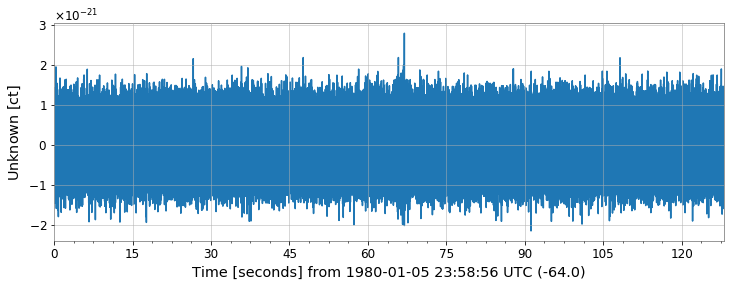

In [5]:
#plot data
plot = gwpy_strain.plot()


3) Plot a spectrogram (or q-transform) of the data, and try to identify the signal.


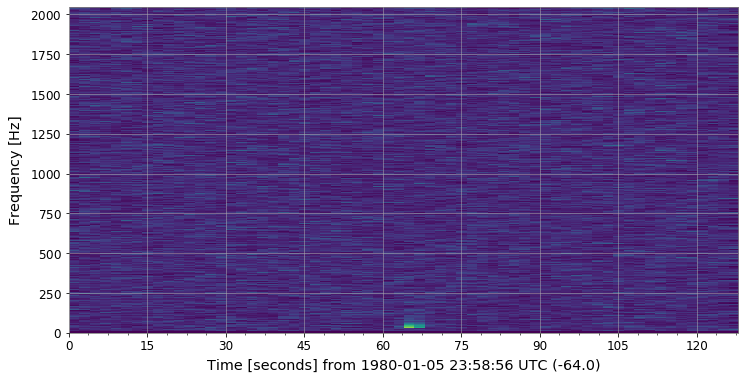

In [6]:
#Plotting a spectogram
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot_spec = specgram.plot()

In [7]:
#get the min and max values

min_spec = specgram.min()
print('Minimum value: ', min_spec)

max_spec = specgram.max()
print('Maximum value: ', max_spec)

Minimum value:  2.014597219342668e-29 ct / Hz(1/2)
Maximum value:  7.678955173853572e-23 ct / Hz(1/2)


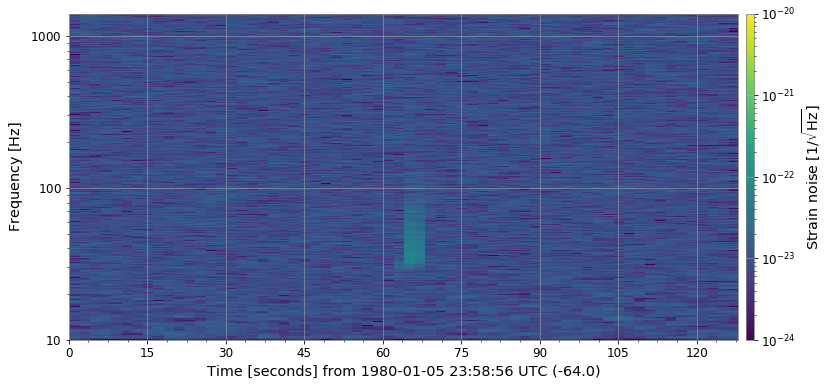

In [8]:
#Makethe spectogram more readable
ax = plot_spec.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot_spec  # refresh

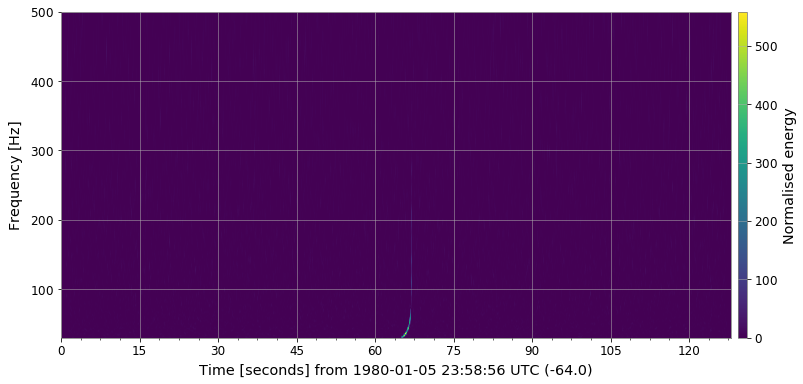

In [9]:
#Apply Q-transform
hq = gwpy_strain.q_transform(frange=(30, 500)) #qrange=(80, 110))
plot_q = hq.plot()
plot_q.colorbar(label="Normalised energy")

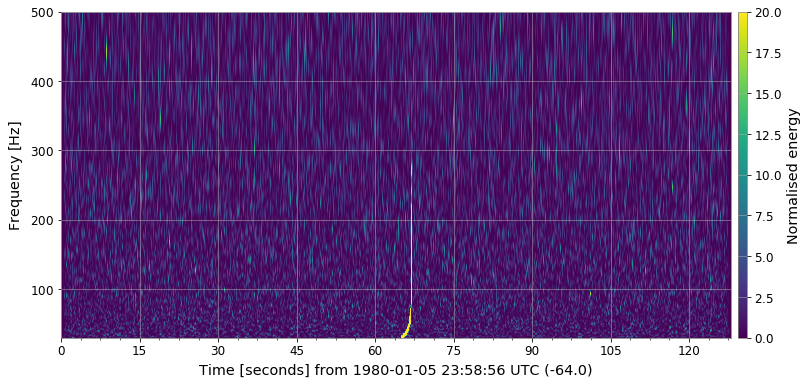

In [10]:
#rescale to see it better
plot_q.colorbars[0].mappable.set_clim(0,20)
plot_q.refresh()
plot_q

4) What is the time of the merger

In [11]:
### As previously, the merger is located at 64s as it can be seen on the plot as the yellow path.